In [1]:
from numpy import *
Nobs = 20
x_true = random.uniform(0,10, size=Nobs)
y_true = random.uniform(-1,1, size=Nobs)
alpha_true = 0.5
beta_x_true = 1.0
beta_y_true = 10.0
eps_true = 0.5
z_true = alpha_true + beta_x_true*x_true + beta_y_true*y_true
z_obs = z_true + random.normal(0, eps_true, size=Nobs)

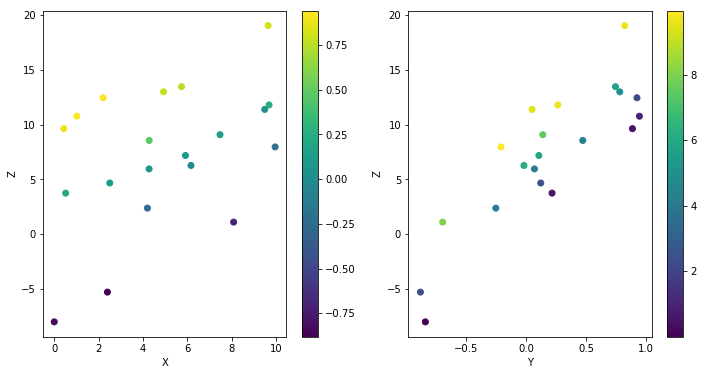

In [2]:

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_true, z_obs, c=y_true, marker='o')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')
plt.subplot(1,2,2)
plt.scatter(y_true, z_obs, c=x_true, marker='o')
plt.colorbar()
plt.xlabel('Y')
plt.ylabel('Z')


In [3]:

model = """
data {
   int<lower=4> N; // Number of data points
   real x[N];      // the 1st predictor
   real y[N];      // the 2nd predictor
   real z[N];      // the outcome
}
parameters {
   real alpha;     // intercept
   real betax;     // x-slope
   real betay;     // y-slope
   real<lower=0> eps;       // dispersion
}
model {
   for (i in 1:N)
      z[i] ~ normal(alpha + betax * x[i] + betay * y[i], eps);
}"""


In [4]:
data = {'N':Nobs, 'x':x_true, 'y':y_true, 'z':z_obs}

In [5]:
import pystan
fit = pystan.stan(model_code=model, data=data, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a87850813aab96ee1be5112f40cf12e0 NOW.


In [6]:
print( fit )


Inference for Stan model: anon_model_a87850813aab96ee1be5112f40cf12e0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha    0.7  7.8e-3   0.26   0.18   0.53   0.69   0.86   1.21   1122    1.0
betax   0.96  1.3e-3   0.04   0.88   0.94   0.97   0.99   1.05   1046    1.0
betay   9.97  7.0e-3   0.24   9.49   9.81   9.96  10.12  10.46   1232    1.0
eps      0.6  3.3e-3   0.11   0.43   0.53   0.59   0.66   0.87   1109    1.0
lp__    0.49    0.06   1.53  -3.51  -0.24   0.84    1.6   2.44    686    1.0

Samples were drawn using NUTS at Tue Aug 22 22:23:39 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


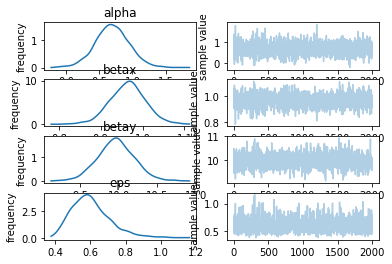

In [7]:
p = fit.plot()

In [8]:
fit 2


SyntaxError: invalid syntax (<ipython-input-8-f4c7a1a5622b>, line 1)

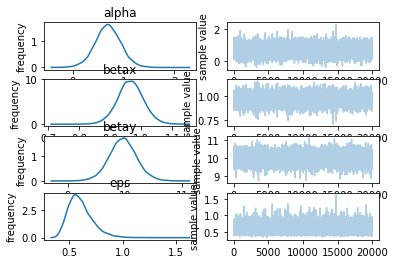

In [9]:
fit2 = pystan.stan(fit=fit, data=data, iter=10000, chains=4)
temp = fit2.plot()

In [10]:

samples = fit2.extract(permuted=True)
alpha = median(samples['alpha'])
beta_x = median(samples['betax'])
beta_y = median(samples['betay'])
eps = median(samples['eps'])

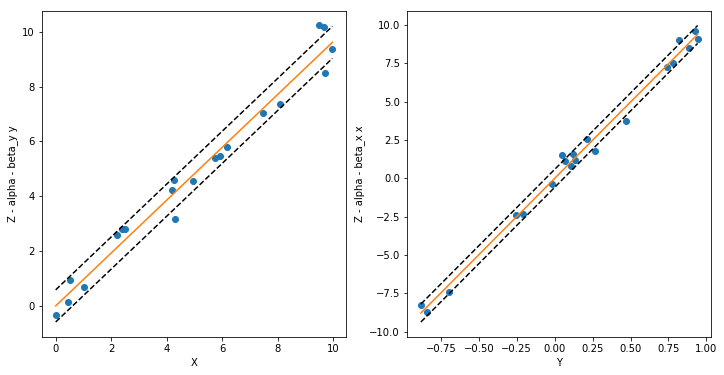

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x_true, z_obs-alpha-beta_y*y_true, 'o')
plt.xlabel('X')
plt.ylabel('Z - alpha - beta_y y')
# Now plot the model
xx = array([x_true.min(), x_true.max()])
plt.plot(xx, xx*beta_x)
plt.plot(xx, xx*beta_x + eps, '--', color='k')
plt.plot(xx, xx*beta_x - eps, '--', color='k')
plt.subplot(1,2,2)
plt.plot(y_true, z_obs-alpha-beta_x*x_true, 'o')
plt.xlabel('Y')
plt.ylabel('Z - alpha - beta_x x')
yy = array([y_true.min(), y_true.max()])
plt.plot(yy, yy*beta_y)
plt.plot(yy, yy*beta_y + eps, '--', color='k')
plt.plot(yy, yy*beta_y - eps, '--', color='k')

[ 1.49578164  0.68990197  0.57079844 ...,  0.51020732  0.66955961
  1.14483965]
(20000, 4)


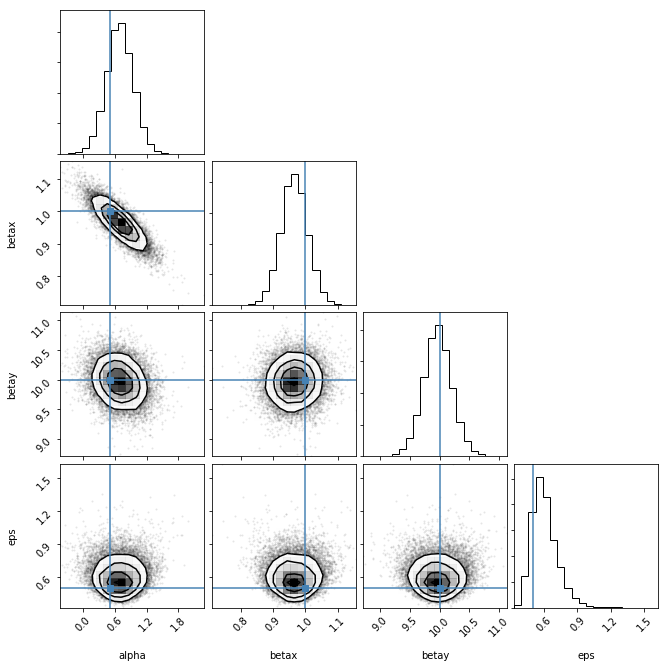

In [15]:
import numpy as np

samples = fit2.extract(permuted=True)
print( samples['alpha'] )

samples = (array([samples['alpha'],samples['betax'], samples['betay'], samples['eps']]) ).T
print( samples.shape )


import triangle
import corner
tmp = triangle.corner(samples[:,:], labels=['alpha','betax','betay','eps'], truths=[alpha_true, beta_x_true, beta_y_true, eps_true]) 

In [1]:
have fun!

SyntaxError: invalid syntax (<ipython-input-1-b016e2467f72>, line 1)